### Grid Utility ###

Use the 'gird.show_path' utility to show all relevant information about a taken path. Provided the intended arguments this will display the starting point (red), ending point (blue), any blockages in the path (grey), the path taken (dashed line) and the evaluated paths (interpolation from yellow to cyan). Ensure the magic for using inline plots is included.

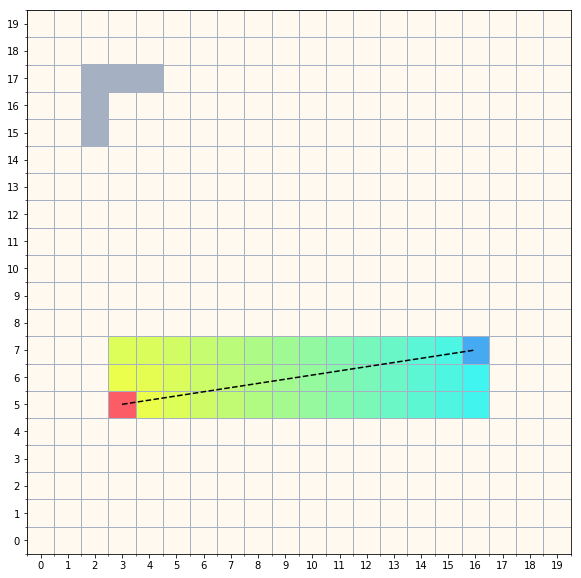

In [52]:
%matplotlib inline

# import importlib
# import grid

# importlib.reload(grid)

from grid import show_path

start = (3, 5)
end = (16, 7)

blocks = [(2, 15), (2, 16), (2, 17), (3, 17), (4, 17)]
path = [start, end]
attempted = [(x, y) for x in range(start[0], end[0] + 1) for y in range(start[1], end[1] + 1)]
                
show_path(start, end, blocks=blocks, path=path, attempted=attempted)

cost: 25.400000000000002


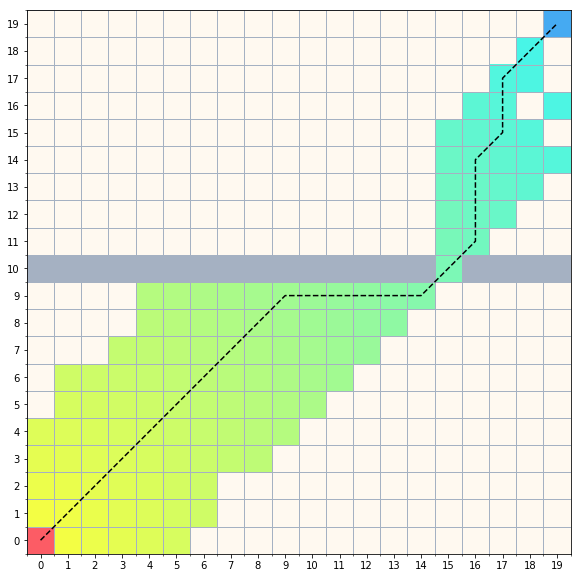

In [81]:
# https://rosettacode.org/wiki/A*_search_algorithm#Python

D = 1   # adjacent cost
D2 = 1.1 # diagonal cost

class AStarGraph(object):
    # Define a class board like grid with two barriers
 
    def __init__(self, barriers=[], width=20, height=20):
        self.barriers = barriers
        self.width = width
        self.height = height
 
    def heuristic(self, start, goal):
        # Use Chebyshev distance heuristic if we can move
        # one square either adjacent or diagonal
        dx = abs(start[0] - goal[0])
        dy = abs(start[1] - goal[1])
        # Compute the number of non-diagonal steps
        # Subtract the steps you save by using the diagonal.
        # There are min(dx, dy) diagonal steps, each one costs D2 but
        # saves 2 x D non-diagonal steps.
        return D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)
 

    def get_vertex_neighbours(self, pos):
        n = []
        # Generate vertex neighbours
        for dx, dy in [(dx, dy) for dx in range(-1, 2) for dy in range(-1, 2)]:
            x2 = pos[0] + dx
            y2 = pos[1] + dy
            if x2 < 0 or x2 >= self.width or y2 < 0 or y2 > self.height:
                continue
            n.append((x2, y2))
        return n
    
 
    def move_cost(self, a, b):
        if b in self.barriers:   # Extremely high cost 
            return 100 # to enter barrier squares
            
        if (a[0] == b[0] or a[1] == b[1]):
            return D
        else:
            return D2


def AStarSearch(start, end, graph):
    G = {} # Actual movement cost to each position from the start position
    F = {} # Estimated movement cost of start to end going via this position
 
    # Initialize starting values
    G[start] = 0 
    F[start] = graph.heuristic(start, end)
 
    closedVertices = set()
    openVertices = set([start])
    cameFrom = {}
 
    while len(openVertices) > 0:
        # Get the vertex in the open list with the lowest F score
        current = None
        currentFscore = None
        for pos in openVertices:
            if current is None or F[pos] < currentFscore:
                currentFscore = F[pos]
                current = pos
 
        # Check if we have reached the goal
        if current == end:
            #Retrace our route backward
            path = [current]
            while current in cameFrom:
                current = cameFrom[current]
                path.append(current)
            path.reverse()
            return path, F[end], closedVertices # Done!
 
        # Mark the current vertex as closed
        openVertices.remove(current)
        closedVertices.add(current)
 
        # Update scores for vertices near the current position
        for neighbour in graph.get_vertex_neighbours(current):
            if neighbour in closedVertices:
                                # We have already processed this node exhaustively
                continue 
            candidateG = G[current] + \
                         graph.move_cost(current, neighbour)
 
            if neighbour not in openVertices:
                                # Discovered a new vertex
                openVertices.add(neighbour)  
            elif candidateG >= G[neighbour]:
                                # This G score is worse than previously found
                continue 
 
            #Adopt this G score
            cameFrom[neighbour] = current
            G[neighbour] = candidateG
                        # Update heuristic
            H = graph.heuristic(neighbour, end)
                        # Update cost function
            F[neighbour] = G[neighbour] + H
 
    raise RuntimeError("A* failed to find a solution")
    
    
barriers =  [(x, 10) for x in range(20)]
barriers.remove((15, 10))

graph = AStarGraph(barriers)
start = (0,0)
end = (19, 19)

result, cost, attempted = AStarSearch(start, end, graph)

print("cost:", cost)

show_path(start, end, blocks=graph.barriers, path=result, attempted=attempted, side=20)

### Graph Definition ###

Three common implementations of graphs 


In [56]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.edges = defaultdict(list)

    def add_edge(self, v1, v2, weight):
        self.edges[v1].append((v2, weight))
        self.edges[v2].append((v1, weight))
        
        
g = Graph()
g.add_edge(1, 2, 7)
g.add_edge(1, 3, 9)
g.add_edge(1, 6, 14)
g.add_edge(2, 3, 10)
g.add_edge(2, 4, 15)
g.add_edge(3, 4, 11)
g.add_edge(3, 6, 2)
g.add_edge(4, 5, 6)
g.add_edge(5, 6, 9)

## Dijsktra's ##

In [58]:
def dijkstra(self, start, end):

    unvisited = []
    prev  = {}
    dist = {}

    for k in self.edges.keys():
        dist[k] = float('Inf')
        prev[k] = None
        unvisited.append(k)

    dist[start] = 0

    while unvisited:

        current = None
        min_d = float('Inf')

        for (v, d) in dist.items():
            if v in unvisited and d < min_d:
                min_d = d
                current = v

        unvisited.remove(current)

        neighbors = self.edges[current]
        for (v, w) in neighbors:
            new_dist = dist[current] + w
            if new_dist < dist[v]:
                dist[v] = new_dist
                prev[v] = current

    path = []
    current = end

    while start not in path:
        path = [current] + path
        current = prev[current]

    length = dist[end]
    return (path, length)


path, weight = dijkstra(g, 1, 5)
print(path, weight)

[1, 3, 6, 5] 20
